# **Monthly Macro-Market Analysis: Industrial Production, Unemployment, CPI, Retail Sales vs. S&P 500**

Objective: Gather monthly data for Industrial Production, Unemployment, CPI (Consumer Price Index) and Retail Sales macro-financial factors, align them with monthly S&P 500 returns, explore their relationships and summarize actionable takeaways.

In [20]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### **Step 1: Align Frequencies and Create Target.**

In [21]:
# ─────────────────────────────────────────────────────────────────
# Part 1: Pull S&P 500 Close Price
# ─────────────────────────────────────────────────────────────────
import datetime
import pandas as pd

START_DATE = '20000101'  # Jan 1, 2000
END_DATE   = datetime.datetime.today().strftime('%Y%m%d') 

url_sp500 = (
    f"https://stooq.com/q/d/l/?s=^spx"
    f"&d1={START_DATE}&d2={END_DATE}"
    f"&i=d"
)

# Stooq CSV has columns: Date, Open, High, Low, Close, Volume
sp500_df_daily = pd.read_csv(
    url_sp500,
    parse_dates=['Date'],
    index_col='Date',
    usecols=['Date', 'Close']
)

# Resample to month-end
sp500_monthly_price = sp500_df_daily.resample('ME').last()

print("S&P 500 monthly month end shape:", sp500_monthly_price.shape)
display(sp500_monthly_price.head())

S&P 500 monthly month end shape: (306, 1)


,Close
Date,
2000-01-31,1394.46
2000-02-29,1366.42
2000-03-31,1498.58
2000-04-30,1452.43
2000-05-31,1420.60


In [22]:
# ─────────────────────────────────────────────────────────────────
# Part 2: Pull Unemployment Rate (UNRATE)
# ─────────────────────────────────────────────────────────────────

START_CUTOFF = '2000-01-01'

url_unrate = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE'

unrate_series = (
    pd.read_csv(
        url_unrate,
        parse_dates=['observation_date'],
        index_col='observation_date'
    )['UNRATE']
)
unrate_series = unrate_series.loc[START_CUTOFF:]
print("UNRATE (monthly) shape:", unrate_series.shape)
display(unrate_series.head())

UNRATE (monthly) shape: (304,)


observation_date
2000-01-01    4.0
2000-02-01    4.1
2000-03-01    4.0
2000-04-01    3.8
2000-05-01    4.0
Name: UNRATE, dtype: float64

In [23]:
# ─────────────────────────────────────────────────────────────────
# Part 3: Pull CPI (CPIAUCSL) from FRED
# ─────────────────────────────────────────────────────────────────

url_cpi = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL'
cpi_series = pd.read_csv(
    url_cpi,
    parse_dates=['observation_date'],
    index_col='observation_date'
)['CPIAUCSL'].rename('CPI')

cpi_series = cpi_series.loc[START_CUTOFF:]
print("CPI (monthly) shape:", cpi_series.shape)
display(cpi_series.head())


CPI (monthly) shape: (304,)


observation_date
2000-01-01    169.3
2000-02-01    170.0
2000-03-01    171.0
2000-04-01    170.9
2000-05-01    171.2
Name: CPI, dtype: float64

In [24]:
# ─────────────────────────────────────────────────────────────────
# part 4: Pull Retail Sales (RSXFSNS) from FRED 
# ─────────────────────────────────────────────────────────────────

url_rsales = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=RSXFSN'
rsales_series = pd.read_csv(
    url_rsales,
    parse_dates=['observation_date'],
    index_col='observation_date'
)['RSXFSN'].rename('RETAIL_SALES')

rsales_series = rsales_series.loc[START_CUTOFF:]
print("RETAIL_SALES (monthly) shape:", rsales_series.shape)
display(rsales_series.head())

RETAIL_SALES (monthly) shape: (304,)


observation_date
2000-01-01    208890
2000-02-01    221662
2000-03-01    247840
2000-04-01    233673
2000-05-01    251700
Name: RETAIL_SALES, dtype: int64

#### **Step 2: Initial Descriptive Statistics: for each factor and the monthly S&P return.**

In [50]:
# ─────────────────────────────────────────────────────────────────
# Part 1: Calculate S&P 500 MoM close price, mean, σ, min, and max
# ─────────────────────────────────────────────────────────────────

sp500_mom = sp500_monthly_price.pct_change().dropna()

print("SP500 MoM Returns:")
display(sp500_mom.head())

print("SP500 MoM Returns Stats:")
print(sp500_mom.describe())

SP500 MoM Returns:


,Close
Date,
2000-02-29,-0.020108
2000-03-31,0.096720
2000-04-30,-0.030796
2000-05-31,-0.021915
2000-06-30,0.023934


SP500 MoM Returns Stats:
            Close
count  305.000000
mean     0.005756
std      0.043998
min     -0.169425
25%     -0.017816
50%      0.011061
75%      0.032549
max      0.126844


In [36]:
# ─────────────────────────────────────────────────────────────────
# Part 2: Unemployment Rate (UNRATE) MoM, mean, σ, min, and max
# ─────────────────────────────────────────────────────────────────

unrate_mom = unrate_series.pct_change().dropna()

print("UNRATE_MoM_Rate from 2000-01-01:")
display(unrate_mom.head())

print("UNRATE_MoM_Rate Stats:")
print(unrate_mom.describe())

UNRATE_MoM_Rate from 2000-01-01:


observation_date
2000-02-01    0.025000
2000-03-01   -0.024390
2000-04-01   -0.050000
2000-05-01    0.052632
2000-06-01    0.000000
Name: UNRATE, dtype: float64

UNRATE_MoM_Rate Stats:
count    303.000000
mean       0.004632
std        0.140801
min       -0.176471
25%       -0.022475
50%        0.000000
75%        0.020204
max        2.363636
Name: UNRATE, dtype: float64


In [37]:
# ─────────────────────────────────────────────────────────────────
# Part 3: CPI (CPIAUCSL) MoM, mean, σ, min, and max
# ─────────────────────────────────────────────────────────────────

cpi_mom = cpi_series.pct_change().dropna()

print("CPI_MoM_inflation from 2000-01-01:")
display(cpi_mom.head())

print("CPI_MoM_inflation Stats:")
print(cpi_mom.describe())


CPI_MoM_inflation from 2000-01-01:


observation_date
2000-02-01    0.004135
2000-03-01    0.005882
2000-04-01   -0.000585
2000-05-01    0.001755
2000-06-01    0.005841
Name: CPI, dtype: float64

CPI_MoM_inflation Stats:
count    303.000000
mean       0.002111
std        0.003053
min       -0.017705
25%        0.000547
50%        0.002209
75%        0.003640
max        0.013768
Name: CPI, dtype: float64


In [38]:
# ─────────────────────────────────────────────────────────────────
# Part 4: Retail Sales (RSXFSNS) MoM, mean, σ, min, and max
# ─────────────────────────────────────────────────────────────────

rsales_mom = rsales_series.pct_change().dropna()

print("RETAIL_SALES_MoM_Growth from 2000-01-01:")
display(rsales_mom.head())

print("RETAIL_SALES_MoM_Growth Stats:")
print(rsales_mom.describe())

RETAIL_SALES_MoM_Growth from 2000-01-01:


observation_date
2000-02-01    0.061142
2000-03-01    0.118099
2000-04-01   -0.057162
2000-05-01    0.077146
2000-06-01   -0.009563
Name: RETAIL_SALES, dtype: float64

RETAIL_SALES_MoM_Growth Stats:
count    303.000000
mean       0.008181
std        0.094032
min       -0.256551
25%       -0.029960
50%        0.006989
75%        0.053581
max        0.281129
Name: RETAIL_SALES, dtype: float64


#### **Step 3: Visual Exploration: Time-series plots (2000–Present) of each variable. Pairwise scatterplots / correlation matrix to see linear relationships.**

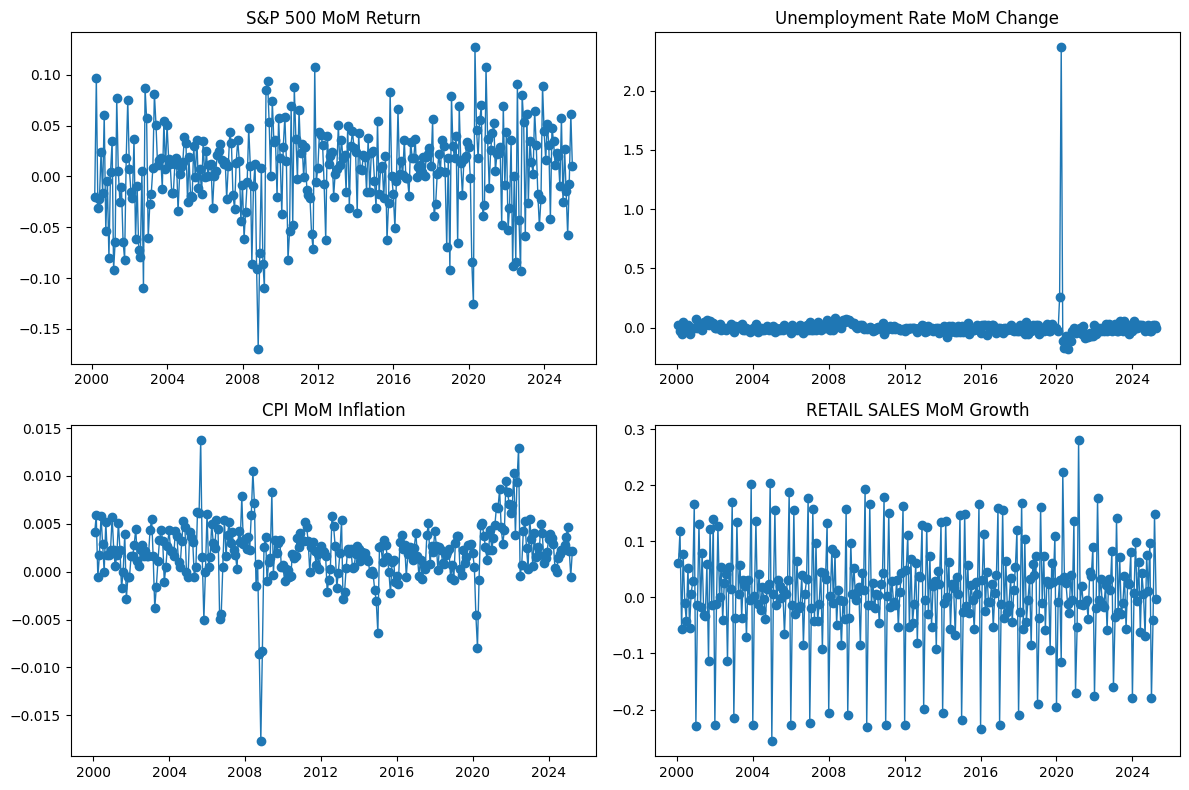

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Top-left: S&P 500 MoM Return
axes[0,0].plot(sp500_mom.index, sp500_mom.values, marker='o', linewidth=1, color='tab:blue')
axes[0,0].set_title("S&P 500 MoM Return")

# Top-right: Unemployment Rate MoM Change
axes[0,1].plot(unrate_mom.index, unrate_mom.values, marker='o', linewidth=1, color='tab:blue')
axes[0,1].set_title("Unemployment Rate MoM Change")

# Bottom-left: CPI MoM inflation
axes[1,0].plot(cpi_mom.index, cpi_mom.values, marker='o', linewidth=1, color='tab:blue')
axes[1,0].set_title('CPI MoM Inflation')

# Bottom-right: RETAIL SALES MoM Growth
axes[1,1].plot(rsales_mom.index, rsales_mom.values, marker='o', linewidth=1, color='tab:blue')
axes[1,1].set_title('RETAIL SALES MoM Growth')

plt.tight_layout()
plt.show()

,UNRATE_MoM,CPI_MoM,RETAIL_SALES_MoM,Close
2000-02-29,0.025000,0.004135,0.061142,-0.020108
2000-03-31,-0.024390,0.005882,0.118099,0.096720
2000-04-30,-0.050000,-0.000585,-0.057162,-0.030796
2000-05-31,0.052632,0.001755,0.077146,-0.021915
2000-06-30,0.000000,0.005841,-0.009563,0.023934


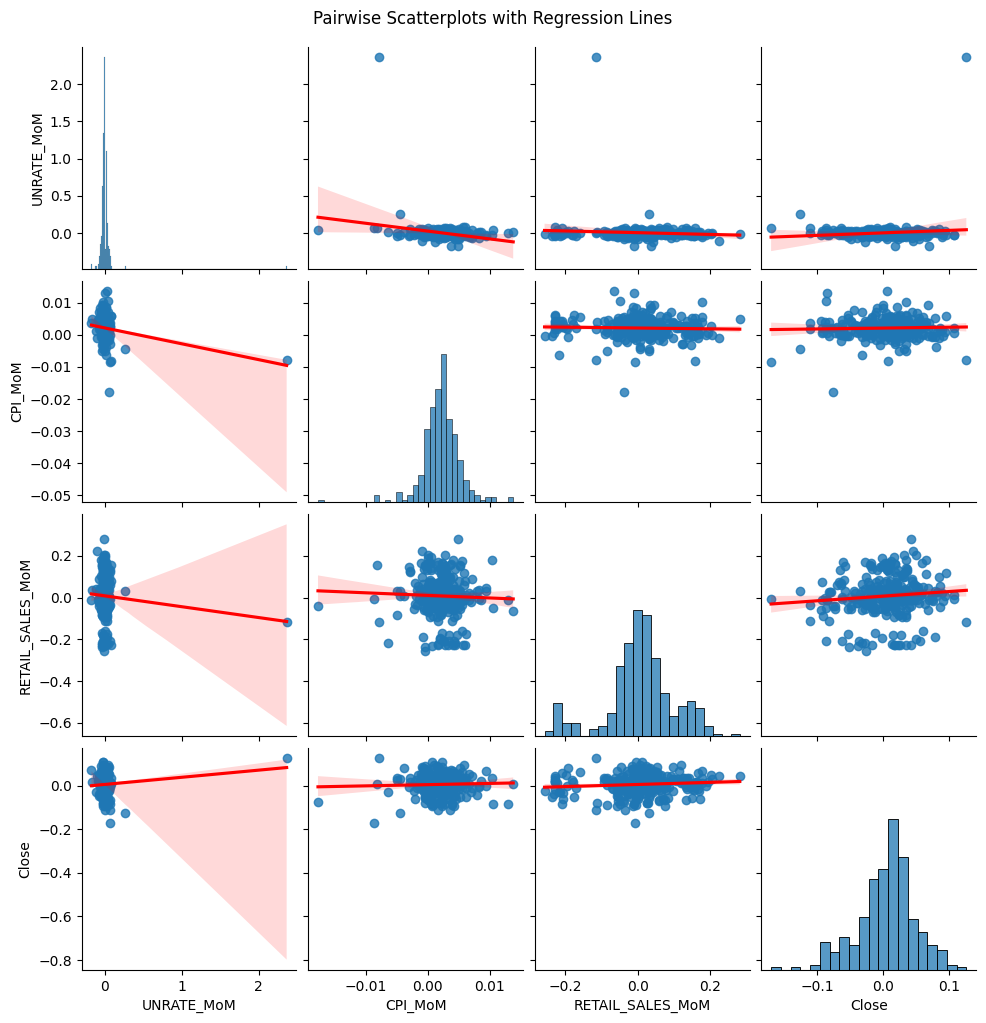

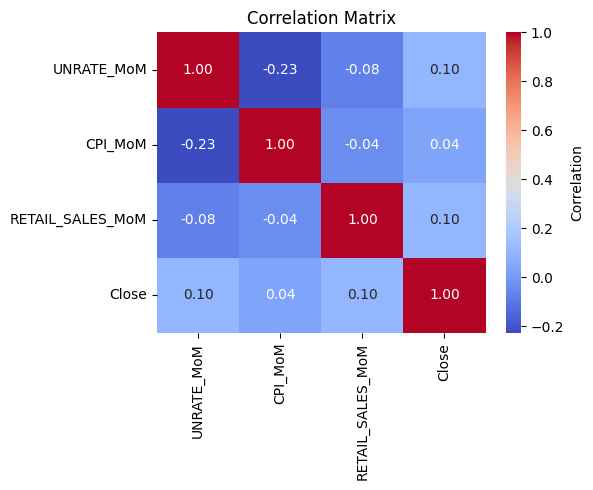

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Set each series to a month‐end index
unrate_mom.index   = unrate_mom.index.to_period('M').to_timestamp('M')
cpi_mom.index      = cpi_mom.index.to_period('M').to_timestamp('M')
rsales_mom.index   = rsales_mom.index.to_period('M').to_timestamp('M')
sp500_mom.index    = sp500_mom.index.to_period('M').to_timestamp('M')

sp500_mom.name = 'SP500_MoM'
unrate_mom.name   = 'UNRATE_MoM'
cpi_mom.name      = 'CPI_MoM'
rsales_mom.name   = 'RETAIL_SALES_MoM'

# Concatenate into a DataFrame
df_monthly = pd.concat([
    unrate_mom,
    cpi_mom,
    rsales_mom,
    sp500_mom
], axis=1).dropna()

display(df_monthly.head())

# Pairwise scatterplots with regression lines
sns.pairplot(
    df_monthly,
    kind='reg',
    plot_kws={'line_kws': {'color': 'red'}}
)
plt.suptitle('Pairwise Scatterplots with Regression Lines', y=1.02)
plt.show()

# Correlation matrix heatmap
corr = df_monthly.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Correlation'}
)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


<span style="color: green;">

**Take Aways:**

- Unemployment & Inflation: Negative correlation (– 0.23) → Consistent with classic macro theory that higher unemployment dampens inflation. But COVID outliers (April/May 2020) exaggerate that effect. When unemployment jumps, inflation tends to fall. 
- Every Other Pairwise Relationship Is Near Zero: Whether looking at CPI ↔ SP500, Retail Sales ↔ SP500, or UNRATE ↔ SP500, the slopes are nearly flat and confidence bands wide. During 2020–2025, none of these single macros are strong, stand‐alone drivers of monthly S&P returns.
- Distributions & Outliers: If we remove the two COVID‐crisis months (April & May 2020), each red regression line would be almost perfectly flat. 



#### **Step 4: Further Analysis: Exclude extreme COVID months (April & May 2020)**


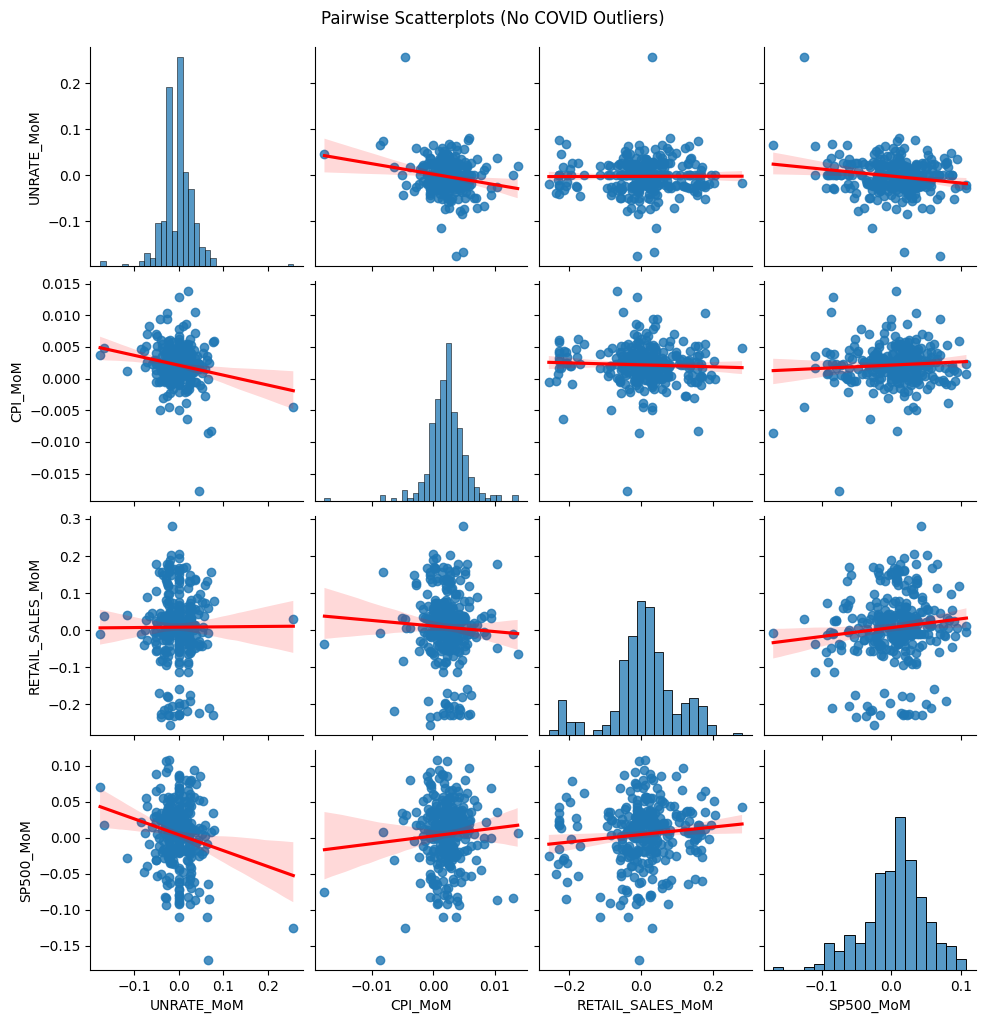

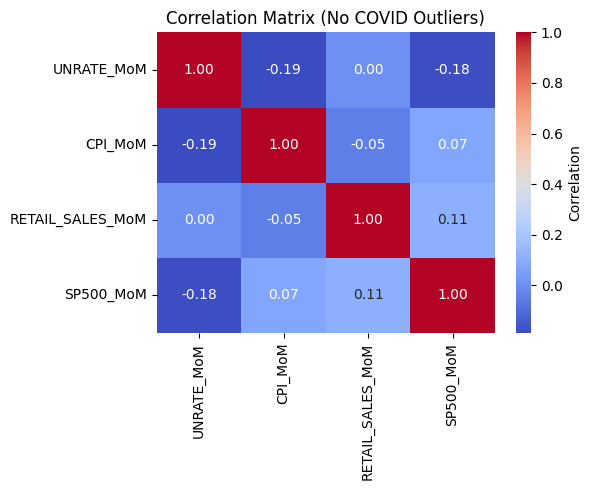

In [53]:
df_monthly = pd.concat(
    [unrate_mom, cpi_mom, rsales_mom, sp500_mom],
    axis=1
).dropna()

df_monthly.columns = [
    'UNRATE_MoM',
    'CPI_MoM',
    'RETAIL_SALES_MoM',
    'SP500_MoM'
]

# Drop the two COVID‐outlier rows (April & May 2020)
df_no_covid = df_monthly.drop(index=['2020-04-30', '2020-05-31'], errors='ignore')

# Pairwise scatterplots with regression lines (no COVID outliers)
sns.pairplot(
    df_no_covid,
    kind='reg',
    plot_kws={'line_kws': {'color': 'red'}},
    vars=['UNRATE_MoM', 'CPI_MoM', 'RETAIL_SALES_MoM', 'SP500_MoM']
)
plt.suptitle('Pairwise Scatterplots (No COVID Outliers)', y=1.02)
plt.show()

# Correlation matrix heatmap (no COVID outliers)
corr_no_covid = df_no_covid.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_no_covid,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Correlation'}
)
plt.title('Correlation Matrix (No COVID Outliers)')
plt.tight_layout()
plt.show()

<span style="color: green;">

**Take Aways Excluding COVID Outliers:**
- UNRATE↔CPI (r ≈ –0.19) remains the most robust macro link, reflecting a dampening of inflation when unemployment rises, but the effect is much smaller once the COVID spike is removed.
- UNRATE↔SP500 (r ≈ –0.18) now shows a weak negative slope: modest jobless upticks tend to slightly coincide with negative equity returns, back in line with standard recession logic.
- RETAIL_SALES↔SP500 (r ≈ +0.11) continues to be the best same-month consumer-health proxy for equities: stronger spending still maps to slightly better stock performance.
- CPI↔SP500 (r ≈ +0.07) is effectively zero, meaning near-term inflation changes did not meaningfully move equity markets in this period.
- All other pairwise correlations hover near zero, indicating that small monthly movements in these macro series have had only very limited co-movement with one another (or with equities) in 2020–mid-2025 once we exclude the extraordinary COVID outliers.

#### **Step 5: Hypothesis Formulation: Propose three testable hypotheses linking factors to S&P returns.**


**Hypothesis 1: Lagged Unemployment → S&P 500**
- H₀ (null): Last month’s unemployment change (UNRATE_MoMₜ₋₁) has no effect on this month’s S&P 500 return (SP500_MoMₜ).
- H₁ (alt): Last month’s unemployment change (UNRATE_MoMₜ₋₁) has a negative effect on this month’s S&P 500 return (SP500_MoMₜ).

In [77]:
import statsmodels.api as sm

# ───────────────────────────────────────────────────────────────────────
# 2. Create the lagged unemployment feature: UNRATE_MoM_{t-1}
# ───────────────────────────────────────────────────────────────────────
df_no_covid['UNRATE_MoM_Lag1'] = df_no_covid['UNRATE_MoM'].shift(1)

# 3. Drop any NaNs created by lagging
df1 = df_no_covid[['SP500_MoM', 'UNRATE_MoM_Lag1']].dropna()

# 4. Run OLS: SP500_MoM_t ~ UNRATE_MoM_{t-1}
X = sm.add_constant(df1['UNRATE_MoM_Lag1'])   # adds intercept term
y = df1['SP500_MoM']
model1 = sm.OLS(y, X).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SP500_MoM   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.037
Date:                Tue, 03 Jun 2025   Prob (F-statistic):              0.155
Time:                        22:43:12   Log-Likelihood:                 515.67
No. Observations:                 300   AIC:                            -1027.
Df Residuals:                     298   BIC:                            -1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0048      0.003     

<span style="color: green;">

**Recap for Hypothesis 1:**
- R-squared = 0.007 means that only 0.7 % of the month-to-month variation in SP500_MoM is explained by lagged UNRATE_MoM. In other words, the fit is extremely weak.
- Coefficient on UNRATE_MoM_Lag1 = –0.0991, says “If last month’s unemployment MoM goes up by 1 pp, this month’s S&P return tends to be about –0.099 pp.” However, the two-tailed p-value is 0.155, so for a one-sided test “H₁: β < 0,” we would use p_one-sided ≈ 0.155∕2 = 0.0775, which is still > 0.05. We do not have statistically significant evidence (at the 5 % level) that lagged unemployment predicts SP500 returns.
- Constant (α) = 0.0048, this intercept is marginally positive but also not quite “significant” at 5 % (p=0.057).

**Hypothesis 2: Lagged Retail Sales → S&P 500**

- H₀ (null): Last month’s retail‐sales growth (RETAIL_SALES_MoMₜ₋₁) has no effect on this month’s S&P 500 return (SP500_MoMₜ).
- H₁ (alt): Last month’s retail‐sales growth (RETAIL_SALES_MoMₜ₋₁) has a positive effect on this month’s S&P 500 return (SP500_MoMₜ).

In [78]:
# ───────────────────────────────────────────────────────────────────────
# 1. Create the lagged retail-sales feature: RETAIL_SALES_MoM_{t-1}
# ───────────────────────────────────────────────────────────────────────
df_no_covid['RETAIL_SALES_MoM_Lag1'] = df_no_covid['RETAIL_SALES_MoM'].shift(1)

# 2. Drop NaNs from lagging
df2 = df_no_covid[['SP500_MoM', 'RETAIL_SALES_MoM_Lag1']].dropna()

# 3. Run OLS: SP500_MoM_t ~ RETAIL_SALES_MoM_{t-1}
X2 = sm.add_constant(df2['RETAIL_SALES_MoM_Lag1'])
y2 = df2['SP500_MoM']
model2 = sm.OLS(y2, X2).fit()

print(model2.summary())



                            OLS Regression Results                            
Dep. Variable:              SP500_MoM   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6493
Date:                Tue, 03 Jun 2025   Prob (F-statistic):              0.421
Time:                        22:44:09   Log-Likelihood:                 514.97
No. Observations:                 300   AIC:                            -1026.
Df Residuals:                     298   BIC:                            -1019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

<span style="color: green;">

**Recap for Hypothesis 2:**
- R-squared = 0.002, only 0.2 % of the month‐to‐month variation in S&P returns is explained by last month’s retail sales change. In other words, this model on a single predictor has virtually no explanatory power.
- Coefficient on RETAIL_SALES_MoM_Lag1 = +0.0218 (Std Err = 0.027, t = 0.806, p = 0.421), which says “A 10 % MoM increase in retail sales last month is (on average) associated with a 0.218 % increase in this month’s S&P return.”. However, the two‐tailed p-value is 0.421, which means it is not statistically significant (even a one-sided test “β > 0” would give p ≈ 0.421/2 = 0.2105 > 0.05). We fail to reject H₀ (“β = 0”)—there is no statistically significant evidence, in this full sample, that lagged retail sales MoM predicts S&P MoM. 
- Constant (α) = 0.0049 (p = 0.052), it is marginally positive (0.49 % per month) but not quite significant at the 5 % level (p = 0.052).


**Hypothesis 3: CPI Has No Predictive Power Outside Extreme Months**

- H₀ (null): There is no difference in average S&P 500 returns in months where CPI MoM is “normal” (≤ 1% MoM) vs. “high” ( > 1% MoM).
- H₁ (alt): There is a difference in average S&P 500 returns between “normal” CPI months and “high” CPI months.

In [69]:
from scipy import stats

# 1. Create a boolean mask for high‐CPI months: CPI_MoM > 1% (0.01)
high_cpi_mask = df_no_covid['CPI_MoM'] > 0.01

# 2. Define two groups of SP500 returns
sp_low_cpi  = df_no_covid.loc[~high_cpi_mask, 'SP500_MoM']  # CPI_MoM ≤ 0.01
sp_high_cpi = df_no_covid.loc[high_cpi_mask,  'SP500_MoM']  # CPI_MoM >  0.01

print(f"Number of low‐CPI months: {len(sp_low_cpi)}")
print(f"Number of high‐CPI months: {len(sp_high_cpi)}\n")

# 3. Compute group means and descriptive stats
print("Mean SP500 return (low CPI):  ", sp_low_cpi.mean().round(4))
print("Mean SP500 return (high CPI): ", sp_high_cpi.mean().round(4))
print("StdDev SP500 (low CPI):        ", sp_low_cpi.std().round(4))
print("StdDev SP500 (high CPI):       ", sp_high_cpi.std().round(4), "\n")

# 4. Perform two-sample t-test (unequal variance, two‐tailed)
t_stat, p_val = stats.ttest_ind(sp_low_cpi, sp_high_cpi, equal_var=False, nan_policy='omit')

print(f"T‐statistic: {t_stat:.4f}")
print(f"P‐value (two‐tailed): {p_val:.4f}")

# 5. For a two‐sided test at α = 0.05, if p-value < 0.05, reject H₀.
if p_val < 0.05:
    print("reject H₀, meaning there is a statistically significant difference in average SP500 returns between “high CPI” and “low CPI” months.")
else:
    print("fail to reject H₀, meaning no evidence of a difference")

Number of low‐CPI months: 297
Number of high‐CPI months: 4

Mean SP500 return (low CPI):   0.0055
Mean SP500 return (high CPI):  -0.0318
StdDev SP500 (low CPI):         0.0432
StdDev SP500 (high CPI):        0.0625 

T‐statistic: 1.1901
P‐value (two‐tailed): 0.3186
fail to reject H₀, meaning no evidence of a difference


<span style="color: green;">

**Recap for Hypothesis 3:**
- p ≈ 0.319 > 0.05, we fail to reject H₀ (“the two groups have the same mean”). In other words, although the four “high-CPI” months in your sample had an average S&P return of –3.18 % compared to +0.55 % in the 297 “low-CPI” months, that difference is not statistically significant at the 5 % level.
- Only four “high-CPI” months lie above 1 % MoM in your entire 300-month sample. That tiny n makes it very difficult to detect a reliable difference in means.
- From a risk‐management perspective, we note that severe inflation months appear tougher on stocks—yet with just four data points, we cannot conclude that “inflation > 1 % MoM” systematically hurts the S&P in a way that survives statistical scrutiny.

#### **Step 6: Key Takeways:**

- None of the three macro factors (UNRATE, CPI, Retail Sales), whether lagged or current‐month, serves as a strong, reliable single predictor of same‐month S&P 500 returns. At best, lagged unemployment or lagged retail show a very mild predictive tendency (β ≈ ±0.1), but neither effect survives a 5% significance test over the full 25‐year sample or the post‐2020 subset.



#### **Step 7: Insights:**

- Although the “common wisdom” is that higher inflation hurts equities, our scatter/heatmap show almost zero correlation between CPI MoM and S&P MoM over this particular period.
- Unemployment is the “Best of the Bunch”: Its negative link with CPI (–0.23) is the most economically consistent signal we see: when joblessness soars (lockdowns), inflation collapses. Its mild positive link with equities is entirely due to April/May 2020, so in “normal” months, UNRATE wasn’t a reliable same‐month predictor of S&P returns.
- Don’t Rely on Single Monthly Macro Prints: Small month-to-month swings in unemployment, CPI, or retail sales by themselves do not reliably predict stock returns.
- Focus on Regime Changes & Policy Signals: Large, persistent deviations (e.g., multi-month inflation > 0.5% or unemployment > 0.10% MoM) may carry more weight, but you must control for Fed announcements, M2 growth, or fiscal policy changes.
